
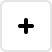
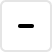
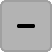
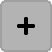
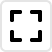
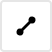
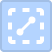
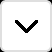
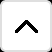
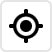

In [1]:
from lets_plot import *
import pandas as pd
LetsPlot.setup_html()

In [2]:
# Support of multiple lines

d = {
    'hjust': [0, 0.5, 1],
    'vjust': [0, 0.5, 1],
    'angle': [0, 30],
    'label': ["first line\nsecond line"]
}

from itertools import product
td = pd.DataFrame(product(*d.values()), columns=d.keys())

p = (ggplot(td, aes(x='hjust', y='vjust')) + 
    geom_point(size=3) +
    theme_light() + theme(panel_grid=element_blank())
)

pf = ( p + scale_x_continuous(breaks=[0, 0.5, 1]) +
    scale_y_continuous(breaks=[0, 0.5, 1], expand=[0.4]) +
    facet_grid(x='angle', x_format='{d}°'))


In [3]:
pf + geom_text(aes(label='label', hjust='hjust', vjust='vjust', angle='angle'), size=9)

In [4]:
pf + geom_label(aes(label='label', hjust='hjust', vjust='vjust', angle='angle'), size=9, alpha=0.5)

In [5]:
# Change lineheight

# lineheight = 0.7

p + geom_text(aes(label='label', hjust='hjust', vjust='vjust'), size=9, lineheight=0.7)

In [6]:
p + geom_label(aes(label='label', hjust='hjust', vjust='vjust'), size=9, alpha=0.5, lineheight=0.7)

In [7]:
# lineheight = 2.0

p + geom_text(aes(label='label', hjust='hjust', vjust='vjust'), size=9, lineheight=2)

In [8]:
p + geom_label(aes(label='label', hjust='hjust', vjust='vjust'), size=9, alpha=0.5, lineheight=2)

In [9]:
# Adjust position by nudging a given offset

p2 = ggplot({"x": ["a", "b", "c"], "y": [1.2, 3.4, 2.5]}, aes("x", "y")) + geom_point(size=4) + ggsize(500, 300)

p2 + geom_text(aes(label = "y"))

In [10]:
# Move text - use 'position_nudge'

p2 + geom_text(aes(label = "y"), position=position_nudge(y=0.2))

In [11]:
# The same with 'nudge_y'

p2 + geom_text(aes(label = "y"), nudge_y=0.2)